In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import glob
import seaborn as sns

%matplotlib inline

plt.rcParams["figure.figsize"] = (11, 5)

In [215]:
df = pd.read_csv('~/.cache/webreport/following_error/merge_samples.gz',dtype={"OE.ObservingEngine.currentObservingState": "string"})

In [216]:
df = df.fillna(method='ffill')
df = df.dropna()

column_names=['TimeStampLong',\
              'MACS.AzimuthAxis.position',\
              'MACS.AzimuthAxis.followingError',\
              'MACS.ElevationAxis.position',\
              'OE.ObservingEngine.currentObservingState',\
              'OE.ObservingEngine.slowGuideErrorA',\
              'OE.ObservingEngine.slowGuideErrorB',\
              'ECS.DomeRotation.actualPosition',\
              'ECS.UpperShutter.actualPosition',\
              'EMCS.WeatherStation.meanWindSpeed',\
              'EMCS.WeatherStation.windDirection'
              ]
df = df.reindex(columns=column_names)

In [217]:
df.drop(df[df['MACS.ElevationAxis.position']>90].index, inplace=True)
df.drop( df[df['OE.ObservingEngine.currentObservingState'] =='OFF' ].index, inplace=True)

In [218]:

def normalize_following_error(following_error, elevation):
    return abs(following_error) * math.cos(math.radians(elevation)) * 3600

df['MACS.AzimuthAxis.followingError'] = df.apply(
    lambda row: normalize_following_error(row['MACS.AzimuthAxis.followingError'], row['MACS.ElevationAxis.position']),
    axis=1)


In [219]:
df

,TimeStampLong,MACS.AzimuthAxis.position,MACS.AzimuthAxis.followingError,MACS.ElevationAxis.position,OE.ObservingEngine.currentObservingState,OE.ObservingEngine.slowGuideErrorA,OE.ObservingEngine.slowGuideErrorB,ECS.DomeRotation.actualPosition,ECS.UpperShutter.actualPosition,EMCS.WeatherStation.meanWindSpeed,EMCS.WeatherStation.windDirection
184,2022-03-01 20:03:26.734577,-58.017900,0.042326,52.217245,SLEWING,0.000000e+00,0.000000e+00,302.584991,87.902496,12.799778,189.0
185,2022-03-01 20:03:26.913430,-58.017900,0.047846,52.217245,SLEWING,0.000000e+00,0.000000e+00,302.584991,87.902496,12.799778,189.0
186,2022-03-01 20:03:27.313429,-58.017900,0.019599,52.217245,SLEWING,0.000000e+00,0.000000e+00,302.584991,87.902496,12.799778,189.0
187,2022-03-01 20:03:28.313325,-58.017900,0.085992,52.217245,SLEWING,0.000000e+00,0.000000e+00,302.584991,87.902496,12.799778,189.0
188,2022-03-01 20:03:28.513334,-58.017900,0.019524,52.217245,SLEWING,0.000000e+00,0.000000e+00,302.584991,87.902496,12.799778,189.0
...,...,...,...,...,...,...,...,...,...,...,...
2027346,2022-03-31 06:36:35.092393,236.343139,0.010240,45.731143,TRACKING,4.124244e-07,2.999639e-07,235.764008,87.941498,6.730589,195.0
2027347,2022-03-31 06:36:38.092248,236.343139,0.010240,45.731143,TRACKING,4.124244e-07,2.999639e-07,235.764008,87.941498,6.730589,171.0
2027348,2022-03-31 06:36:41.092243,236.343139,0.010240,45.731143,TRACKING,4.124244e-07,2.999639e-07,235.764008,87.941498,6.730589,197.0
2027349,2022-03-31 06:36:44.092281,236.343139,0.010240,45.731143,TRACKING,4.124244e-07,2.999639e-07,235.764008,87.941498,6.730589,192.0


In [220]:
df.describe()

,MACS.AzimuthAxis.position,MACS.AzimuthAxis.followingError,MACS.ElevationAxis.position,OE.ObservingEngine.slowGuideErrorA,OE.ObservingEngine.slowGuideErrorB,ECS.DomeRotation.actualPosition,ECS.UpperShutter.actualPosition,EMCS.WeatherStation.meanWindSpeed,EMCS.WeatherStation.windDirection
count,1.300997e+06,1.300997e+06,1.300997e+06,1.300997e+06,1.300997e+06,1.300997e+06,1.300997e+06,1.300997e+06,1.300997e+06
mean,1.307367e+02,5.264156e-01,6.068835e+01,-1.420840e-08,-1.412409e-08,1.921247e+02,7.793518e+01,5.981184e+00,1.494711e+02
std,1.232441e+02,1.161431e+00,1.413837e+01,5.155688e-07,5.721967e-07,1.043969e+02,2.778887e+01,3.497697e+00,5.990946e+01
min,-1.626485e+02,0.000000e+00,2.325501e+01,-2.710844e-05,-1.755423e-05,1.818180e-02,1.562500e-01,0.000000e+00,0.000000e+00
25%,2.661642e+01,1.858863e-02,5.185913e+01,-1.100160e-07,-1.036152e-07,9.710150e+01,8.789830e+01,3.116978e+00,1.140000e+02
50%,1.538822e+02,5.244618e-02,6.006994e+01,0.000000e+00,0.000000e+00,2.040710e+02,8.791850e+01,4.606678e+00,1.470000e+02
75%,2.277606e+02,3.197285e-01,7.106375e+01,1.319625e-07,9.921825e-08,2.877050e+02,8.793830e+01,8.796656e+00,1.650000e+02
max,3.531905e+02,1.178840e+01,8.977341e+01,1.216055e-05,1.759352e-05,3.600000e+02,8.794750e+01,1.556530e+01,3.590000e+02


In [221]:
print(df['OE.ObservingEngine.currentObservingState'].value_counts())

GUIDING     494394
TRACKING    417708
SLEWING     388895
Name: OE.ObservingEngine.currentObservingState, dtype: Int64


La primera pregunta es como afecta el viento al following error. Es decir, si el viento es fuerte, sube el following error. Para que el viento afecte, debería estar alineado azimuth con la compuerta. Por lo tanto lo primero es ver en que situaciones azimuth y compuerta están alineadas.

MACS.AzimuthAxis.followingError =\
    F ( MACS.AzimuthAxis.position, MACS.ElevationAxis.position, ECS.DomeRotation.actualPosition , EMCS.WeatherStation.meanWindSpeed, EMCS.WeatherStation.windDirection )

Para ello tengo que agrupar los valores en bins. Todos son valores de angulos menos velocidad del viento. Podría agruparlos por valores de 15.

Realmente lo que quiero saber es si:

MACS.AzimuthAxis.followingError =\
    F (  EMCS.WeatherStation.meanWindSpeed )

En aquellos casos en que está alineado MACS.AzimuthAxis.position , ECS.DomeRotation.actualPosition y con EMCS.WeatherStation.windDirection.

O si,

MACS.AzimuthAxis.followingError =\
    F (  EMCS.WeatherStation.meanWindSpeed, MACS.ElevationAxis.position  )

En aquellos casos en que está alineado MACS.AzimuthAxis.position , ECS.DomeRotation.actualPosition y con EMCS.WeatherStation.windDirection.



In [222]:
df_following_star = df[( df['OE.ObservingEngine.currentObservingState'] =='TRACKING' ) | ( df['OE.ObservingEngine.currentObservingState'] =='GUIDING' ) ]
df_following_star = df_following_star[( df_following_star['ECS.UpperShutter.actualPosition'] > 87 )  ]
df_following_star

,TimeStampLong,MACS.AzimuthAxis.position,MACS.AzimuthAxis.followingError,MACS.ElevationAxis.position,OE.ObservingEngine.currentObservingState,OE.ObservingEngine.slowGuideErrorA,OE.ObservingEngine.slowGuideErrorB,ECS.DomeRotation.actualPosition,ECS.UpperShutter.actualPosition,EMCS.WeatherStation.meanWindSpeed,EMCS.WeatherStation.windDirection
190,2022-03-01 20:03:28.734467,-58.017900,0.195146,52.217245,TRACKING,0.000000e+00,0.000000e+00,302.584991,87.902496,12.799778,189.0
191,2022-03-01 20:03:28.913328,-58.017900,0.048017,52.217245,TRACKING,0.000000e+00,0.000000e+00,302.584991,87.902496,12.799778,189.0
192,2022-03-01 20:03:29.113335,-58.017900,0.171821,52.217245,TRACKING,0.000000e+00,0.000000e+00,302.584991,87.902496,12.799778,189.0
193,2022-03-01 20:03:29.184878,-58.017900,0.171821,52.217245,TRACKING,0.000000e+00,0.000000e+00,302.584991,87.902496,12.799778,183.0
194,2022-03-01 20:03:29.313325,-58.017900,0.033719,52.217245,TRACKING,0.000000e+00,0.000000e+00,302.584991,87.902496,12.799778,183.0
...,...,...,...,...,...,...,...,...,...,...,...
2027346,2022-03-31 06:36:35.092393,236.343139,0.010240,45.731143,TRACKING,4.124244e-07,2.999639e-07,235.764008,87.941498,6.730589,195.0
2027347,2022-03-31 06:36:38.092248,236.343139,0.010240,45.731143,TRACKING,4.124244e-07,2.999639e-07,235.764008,87.941498,6.730589,171.0
2027348,2022-03-31 06:36:41.092243,236.343139,0.010240,45.731143,TRACKING,4.124244e-07,2.999639e-07,235.764008,87.941498,6.730589,197.0
2027349,2022-03-31 06:36:44.092281,236.343139,0.010240,45.731143,TRACKING,4.124244e-07,2.999639e-07,235.764008,87.941498,6.730589,192.0


In [223]:
df_following_star.describe()

,MACS.AzimuthAxis.position,MACS.AzimuthAxis.followingError,MACS.ElevationAxis.position,OE.ObservingEngine.slowGuideErrorA,OE.ObservingEngine.slowGuideErrorB,ECS.DomeRotation.actualPosition,ECS.UpperShutter.actualPosition,EMCS.WeatherStation.meanWindSpeed,EMCS.WeatherStation.windDirection
count,806099.000000,806099.000000,806099.000000,8.060990e+05,8.060990e+05,806099.000000,806099.000000,806099.000000,806099.000000
mean,121.122898,0.131110,59.409531,-1.504650e-08,-1.719182e-08,211.440520,87.871860,6.024104,144.357954
std,130.351737,0.432441,12.371722,5.891621e-07,6.655750e-07,100.651640,0.141627,3.448187,59.853445
min,-162.648475,0.000000,23.255006,-2.710844e-05,-1.755423e-05,0.048485,87.196503,0.000000,0.000000
25%,-0.421163,0.014731,52.176299,-1.557748e-07,-1.418280e-07,145.727005,87.902496,3.255867,111.000000
50%,145.858192,0.031483,58.941292,0.000000e+00,0.000000e+00,226.600006,87.930702,4.754989,139.000000
75%,227.879206,0.079088,68.358092,1.933609e-07,1.791322e-07,291.826996,87.939499,8.796656,161.000000
max,352.782277,8.060956,89.773410,1.216055e-05,1.759352e-05,360.000000,87.947502,15.565300,359.000000


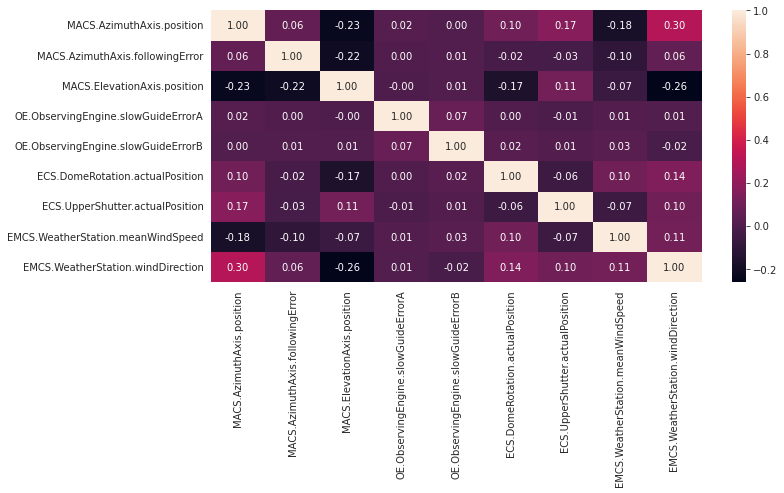

In [224]:
sns.heatmap(df_following_star.corr(), annot=True, fmt='.2f')
plt.show()

In [198]:
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.mode.chained_assignment = None  # default='warn'
df_following_star['MACS.AzimuthAxis.position.bin']=pd.cut(df_following_star['MACS.AzimuthAxis.position'], np.arange(-170,360,15),labels=False)
df_following_star['ECS.DomeRotation.actualPosition.bin']=pd.cut(df_following_star['ECS.DomeRotation.actualPosition'], np.arange(-170,360,15),labels=False)
df_following_star['EMCS.WeatherStation.windDirection.bin']=pd.cut(df_following_star['EMCS.WeatherStation.windDirection'], np.arange(-170,360,15),labels=False)
df_following_star['EMCS.WeatherStation.meanWindSpeed.bin']=pd.cut(df_following_star['EMCS.WeatherStation.meanWindSpeed'], np.arange(0,15,2),labels=False)
df_following_star['MACS.AzimuthAxis.followingError.bin']=pd.cut(df_following_star['MACS.AzimuthAxis.followingError'], np.arange(0,1,0.01),labels=False)


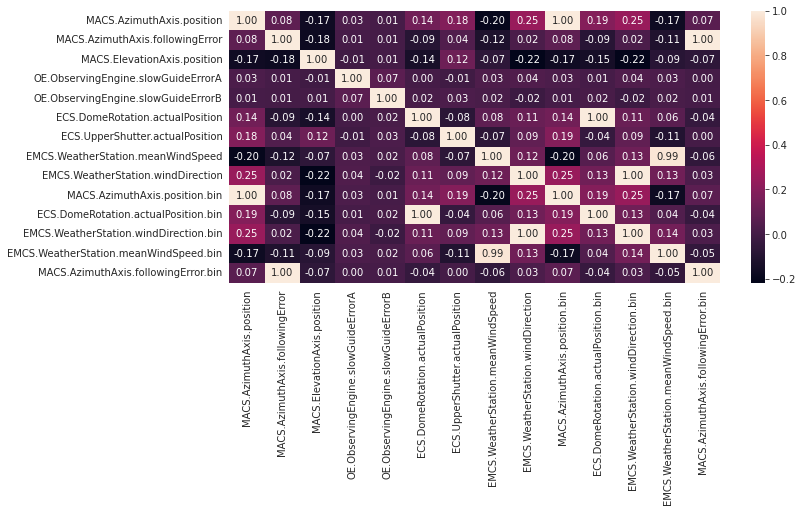

In [199]:
sns.heatmap(df_following_star.corr(), annot=True, fmt='.2f')
plt.show()

In [200]:
df_following_star.groupby(['MACS.AzimuthAxis.followingError.bin'])['MACS.AzimuthAxis.followingError.bin'].count()

MACS.AzimuthAxis.followingError.bin
0.0     149299
1.0     157760
2.0     123938
3.0      83534
4.0      59694
         ...  
94.0       886
95.0       945
96.0       950
97.0       906
98.0       933
Name: MACS.AzimuthAxis.followingError.bin, Length: 99, dtype: int64

In [155]:
df_following_star_align = df_following_star[(df_following_star['MACS.AzimuthAxis.position.bin']==df_following_star['ECS.DomeRotation.actualPosition.bin']) & (df_following_star['ECS.DomeRotation.actualPosition.bin']==df_following_star['EMCS.WeatherStation.windDirection.bin'])  ]


In [156]:
df_following_star_align

,TimeStampLong,MACS.AzimuthAxis.position,MACS.AzimuthAxis.followingError,MACS.ElevationAxis.position,OE.ObservingEngine.currentObservingState,OE.ObservingEngine.slowGuideErrorA,OE.ObservingEngine.slowGuideErrorB,ECS.DomeRotation.actualPosition,ECS.UpperShutter.actualPosition,EMCS.WeatherStation.meanWindSpeed,EMCS.WeatherStation.windDirection,MACS.AzimuthAxis.position.bin,ECS.DomeRotation.actualPosition.bin,EMCS.WeatherStation.windDirection.bin,EMCS.WeatherStation.meanWindSpeed.bin
71753,2022-03-02 20:00:12.184843,150.972448,0.000070,88.999995,GUIDING,0.000000e+00,0.000000e+00,150.037994,87.904999,10.934556,158.0,"(145, 160]","(145, 160]","(145, 160]","(10, 12]"
71755,2022-03-02 20:00:18.184890,150.972448,0.000070,88.999995,GUIDING,0.000000e+00,0.000000e+00,150.037994,87.904999,10.934556,160.0,"(145, 160]","(145, 160]","(145, 160]","(10, 12]"
71767,2022-03-02 20:00:55.184746,150.972448,0.000070,88.999995,GUIDING,0.000000e+00,0.000000e+00,150.037994,87.904999,10.934556,150.0,"(145, 160]","(145, 160]","(145, 160]","(10, 12]"
71779,2022-03-02 20:01:34.184811,150.972448,0.000070,88.999995,GUIDING,0.000000e+00,0.000000e+00,150.037994,87.904999,10.934556,160.0,"(145, 160]","(145, 160]","(145, 160]","(10, 12]"
71781,2022-03-02 20:01:40.184839,150.972448,0.000070,88.999995,GUIDING,0.000000e+00,0.000000e+00,150.037994,87.904999,10.934556,159.0,"(145, 160]","(145, 160]","(145, 160]","(10, 12]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025870,2022-03-31 06:21:55.473495,153.174099,0.028372,57.796683,TRACKING,4.124244e-07,2.999639e-07,152.483002,87.941498,6.730589,159.0,"(145, 160]","(145, 160]","(145, 160]","(6, 8]"
2025871,2022-03-31 06:21:55.873497,153.174099,0.017202,57.796683,TRACKING,4.124244e-07,2.999639e-07,152.483002,87.941498,6.730589,159.0,"(145, 160]","(145, 160]","(145, 160]","(6, 8]"
2025872,2022-03-31 06:21:56.006202,153.174099,0.017202,57.796683,TRACKING,4.124244e-07,2.999639e-07,152.987000,87.941498,6.730589,159.0,"(145, 160]","(145, 160]","(145, 160]","(6, 8]"
2025877,2022-03-31 06:22:10.092336,153.174099,0.017202,57.796683,TRACKING,4.124244e-07,2.999639e-07,152.987000,87.941498,6.730589,156.0,"(145, 160]","(145, 160]","(145, 160]","(6, 8]"


In [136]:
df_following_star_align.groupby(['EMCS.WeatherStation.meanWindSpeed.bin'])['MACS.AzimuthAxis.followingError'].count()



EMCS.WeatherStation.meanWindSpeed.bin
(0, 2]       2517
(2, 4]      13194
(4, 6]       6953
(6, 8]       8050
(8, 10]      7172
(10, 12]     4144
(12, 14]     2753
(14, 16]        0
(16, 18]        0
(18, 20]        0
(20, 22]        0
(22, 24]        0
(24, 26]        0
(26, 28]        0
Name: MACS.AzimuthAxis.followingError, dtype: int64

In [138]:
df_following_star_align

,TimeStampLong,MACS.AzimuthAxis.position,MACS.AzimuthAxis.followingError,MACS.ElevationAxis.position,OE.ObservingEngine.currentObservingState,OE.ObservingEngine.slowGuideErrorA,OE.ObservingEngine.slowGuideErrorB,ECS.DomeRotation.actualPosition,ECS.UpperShutter.actualPosition,EMCS.WeatherStation.meanWindSpeed,EMCS.WeatherStation.windDirection,MACS.AzimuthAxis.position.bin,ECS.DomeRotation.actualPosition.bin,EMCS.WeatherStation.windDirection.bin,EMCS.WeatherStation.meanWindSpeed.bin
71753,2022-03-02 20:00:12.184843,150.972448,0.000070,88.999995,GUIDING,0.000000e+00,0.000000e+00,150.037994,87.904999,10.934556,158.0,"(145, 160]","(145, 160]","(145, 160]","(10, 12]"
71755,2022-03-02 20:00:18.184890,150.972448,0.000070,88.999995,GUIDING,0.000000e+00,0.000000e+00,150.037994,87.904999,10.934556,160.0,"(145, 160]","(145, 160]","(145, 160]","(10, 12]"
71767,2022-03-02 20:00:55.184746,150.972448,0.000070,88.999995,GUIDING,0.000000e+00,0.000000e+00,150.037994,87.904999,10.934556,150.0,"(145, 160]","(145, 160]","(145, 160]","(10, 12]"
71779,2022-03-02 20:01:34.184811,150.972448,0.000070,88.999995,GUIDING,0.000000e+00,0.000000e+00,150.037994,87.904999,10.934556,160.0,"(145, 160]","(145, 160]","(145, 160]","(10, 12]"
71781,2022-03-02 20:01:40.184839,150.972448,0.000070,88.999995,GUIDING,0.000000e+00,0.000000e+00,150.037994,87.904999,10.934556,159.0,"(145, 160]","(145, 160]","(145, 160]","(10, 12]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025870,2022-03-31 06:21:55.473495,153.174099,0.028372,57.796683,TRACKING,4.124244e-07,2.999639e-07,152.483002,87.941498,6.730589,159.0,"(145, 160]","(145, 160]","(145, 160]","(6, 8]"
2025871,2022-03-31 06:21:55.873497,153.174099,0.017202,57.796683,TRACKING,4.124244e-07,2.999639e-07,152.483002,87.941498,6.730589,159.0,"(145, 160]","(145, 160]","(145, 160]","(6, 8]"
2025872,2022-03-31 06:21:56.006202,153.174099,0.017202,57.796683,TRACKING,4.124244e-07,2.999639e-07,152.987000,87.941498,6.730589,159.0,"(145, 160]","(145, 160]","(145, 160]","(6, 8]"
2025877,2022-03-31 06:22:10.092336,153.174099,0.017202,57.796683,TRACKING,4.124244e-07,2.999639e-07,152.987000,87.941498,6.730589,156.0,"(145, 160]","(145, 160]","(145, 160]","(6, 8]"


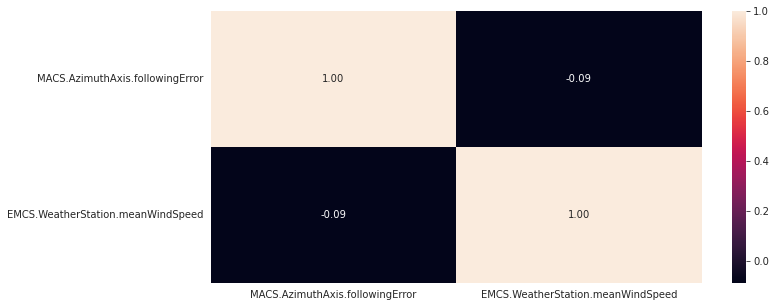

In [142]:
sns.heatmap(df_following_star_align[["MACS.AzimuthAxis.followingError","EMCS.WeatherStation.meanWindSpeed"]].corr(), annot=True, fmt='.2f')
plt.show()


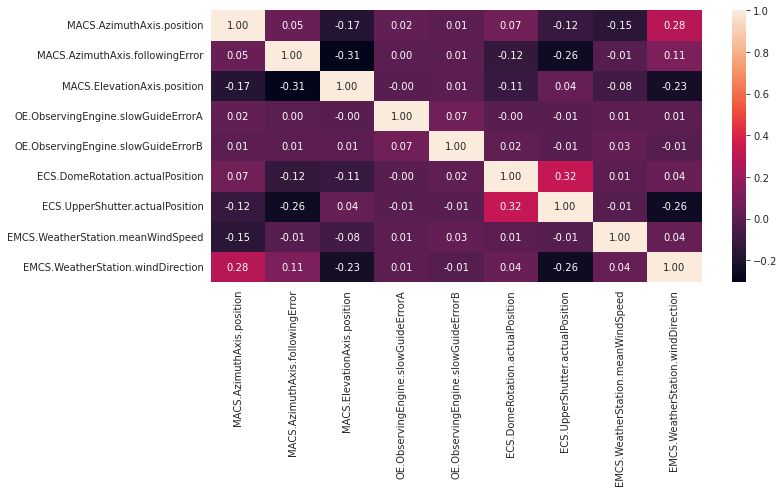

In [137]:
sns.heatmap(df_following_star.corr(), annot=True, fmt='.2f')
plt.show()

In [24]:
Para saber si azimuth y dirección del viento están alineados y si cuando sucede esto y la fuerza del viento es fuerte, aumenta el following error.

SyntaxError: invalid syntax (712045750.py, line 1)

In [28]:
df_following_star[ [ 'MACS.AzimuthAxis.position','ECS.DomeRotation.actualPosition'] ]

,MACS.AzimuthAxis.position,ECS.DomeRotation.actualPosition
190,-58.017900,302.584991
191,-58.017900,302.584991
192,-58.017900,302.584991
193,-58.017900,302.584991
194,-58.017900,302.584991
...,...,...
4291238,90.287957,291.523987
4291240,90.287957,291.523987
4291242,90.287957,291.523987
4291244,90.287957,291.523987


In [66]:
conditions = [ abs(df_following_star['MACS.AzimuthAxis.position']  - df_following_star['ECS.DomeRotation.actualPosition']) < 15,
               abs(df_following_star['MACS.AzimuthAxis.position']  - df_following_star['ECS.DomeRotation.actualPosition']) > 15]
choices = [1,0]
df_following_star['Azimuth.Align.Dome'] = np.select(conditions, choices, default='Tie')
df_following_star['Azimuth.Align.Dome'] = df_following_star['Azimuth.Align.Dome'].astype('int')

/tmp/ipykernel_225759/409988747.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_following_star['Azimuth.Align.Dome'] = np.select(conditions, choices, default='Tie')
/tmp/ipykernel_225759/409988747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_following_star['Azimuth.Align.Dome'] = df_following_star['Azimuth.Align.Dome'].astype('int')


In [76]:
 df_following_star['MACS.AzimuthAxis.position_diff_ECS.DomeRotation.actualPosition'] = abs(df_following_star['MACS.AzimuthAxis.position']  - df_following_star['ECS.DomeRotation.actualPosition'])

/tmp/ipykernel_225759/3370416041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_following_star['MACS.AzimuthAxis.position_diff_ECS.DomeRotation.actualPosition'] = abs(df_following_star['MACS.AzimuthAxis.position']  - df_following_star['ECS.DomeRotation.actualPosition'])


In [77]:
df_following_star.head()

,TimeStampLong,MACS.AzimuthAxis.position,MACS.AzimuthAxis.followingError,MACS.ElevationAxis.position,OE.ObservingEngine.currentObservingState,OE.ObservingEngine.slowGuideErrorA,OE.ObservingEngine.slowGuideErrorB,ECS.DomeRotation.actualPosition,ECS.UpperShutter.actualPosition,EMCS.WeatherStation.meanWindSpeed,EMCS.WeatherStation.windDirection,Azimuth.Align.Dome,MACS.AzimuthAxis.position_diff_ECS.DomeRotation.actualPosition
190,2022-03-01 20:03:28.734467,-58.0179,0.195146,52.217245,TRACKING,0.0,0.0,302.584991,87.902496,12.799778,189.0,0,360.602891
191,2022-03-01 20:03:28.913328,-58.0179,0.048017,52.217245,TRACKING,0.0,0.0,302.584991,87.902496,12.799778,189.0,0,360.602891
192,2022-03-01 20:03:29.113335,-58.0179,0.171821,52.217245,TRACKING,0.0,0.0,302.584991,87.902496,12.799778,189.0,0,360.602891
193,2022-03-01 20:03:29.184878,-58.0179,0.171821,52.217245,TRACKING,0.0,0.0,302.584991,87.902496,12.799778,183.0,0,360.602891
194,2022-03-01 20:03:29.313325,-58.0179,0.033719,52.217245,TRACKING,0.0,0.0,302.584991,87.902496,12.799778,183.0,0,360.602891


In [68]:
df_azimuth_align_dome =  df_following_star[( df_following_star['Azimuth.Align.Dome'] == 1 ) ]

In [69]:
df_azimuth_align_dome.head()

,TimeStampLong,MACS.AzimuthAxis.position,MACS.AzimuthAxis.followingError,MACS.ElevationAxis.position,OE.ObservingEngine.currentObservingState,OE.ObservingEngine.slowGuideErrorA,OE.ObservingEngine.slowGuideErrorB,ECS.DomeRotation.actualPosition,ECS.UpperShutter.actualPosition,EMCS.WeatherStation.meanWindSpeed,EMCS.WeatherStation.windDirection,Azimuth.Align.Dome
20267,2022-03-02 01:56:41.073836,12.102728,0.255026,65.0094,TRACKING,0.0,0.0,11.8245,87.902496,11.749756,164.0,1
20268,2022-03-02 01:56:41.113334,12.102728,0.220852,65.0094,TRACKING,0.0,0.0,11.8245,87.902496,11.749756,164.0,1
20269,2022-03-02 01:56:41.184831,12.102728,0.220852,65.0094,TRACKING,0.0,0.0,11.8245,87.902496,11.749756,168.0,1
20270,2022-03-02 01:56:41.313335,12.102728,0.262219,65.0094,TRACKING,0.0,0.0,11.8245,87.902496,11.749756,168.0,1
20271,2022-03-02 01:56:41.513335,12.102728,0.193358,65.0094,TRACKING,0.0,0.0,11.8245,87.902496,11.749756,168.0,1


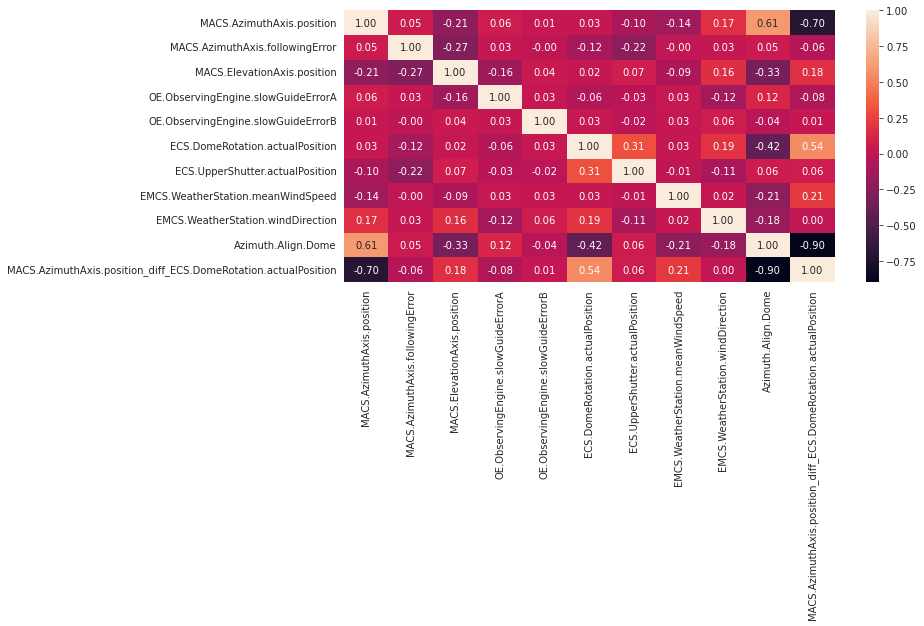

In [78]:
sns.heatmap(df_following_star.corr(), annot=True, fmt='.2f')
plt.show()

In [ ]:
wind_speed_vals = df_following_star.groupby(pd.cut(df_following_star['EMCS.WeatherStation.windDirection'], np.arange(0, 360, 15)))['EMCS.WeatherStation.meanWindSpeed'].max()

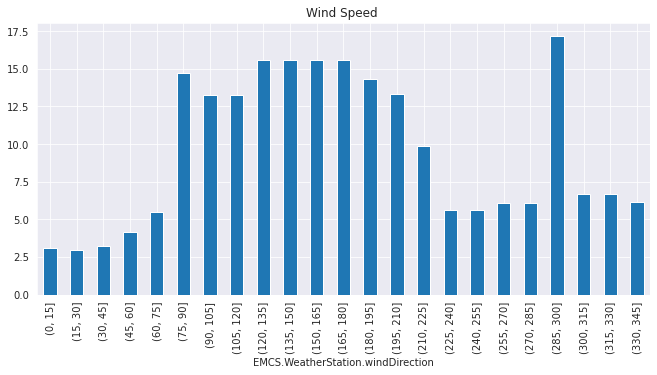

In [19]:
(wind_speed_vals).plot(kind="bar");
plt.title("Wind Speed ");

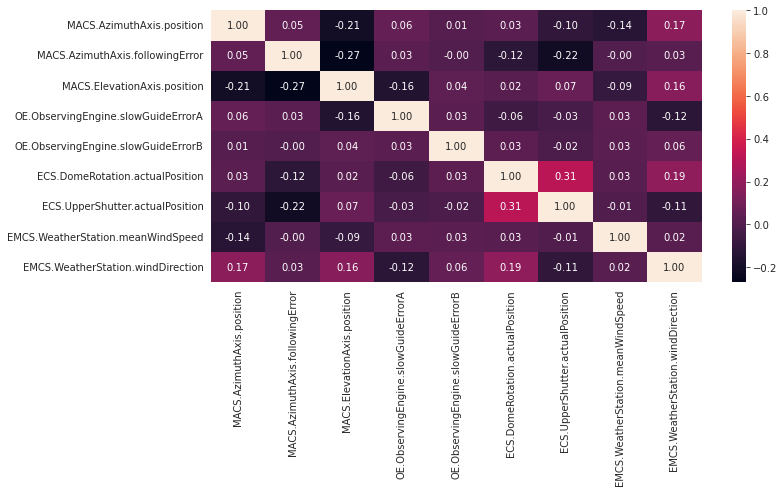

In [41]:
elevation_vals = df_track.groupby(pd.cut(df_track['MACS.ElevationAxis.position'], np.arange(20, 90, 5)))['MACS.ElevationAxis.position'].count()

NameError: name 'df_track' is not defined

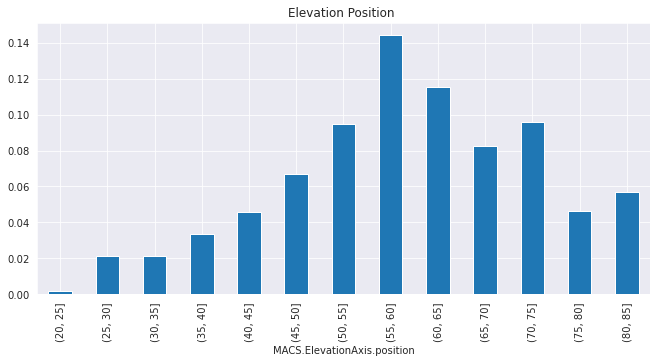

In [365]:
(elevation_vals/df_track.shape[0]).plot(kind="bar");
plt.title("Elevation Position ");

In [366]:
azimuth_vals = df_track.groupby(pd.cut(df_track['MACS.AzimuthAxis.position'], np.arange(-175.7, 355.7, 15)))['MACS.AzimuthAxis.position'].count()

In [ ]:
Para el estudio del viento, normalizar azimuth para angulos equivalentes

In [392]:
df.apply(lambda  x: 360 + x['MACS.AzimuthAxis.position'] , axis=1 )

184        301.982100
185        301.982100
186        301.982100
187        301.982100
188        301.982100
              ...    
4291263    450.287957
4291264    450.287957
4291265    450.287957
4291266    450.287957
4291267    450.287957
Length: 4291084, dtype: float64

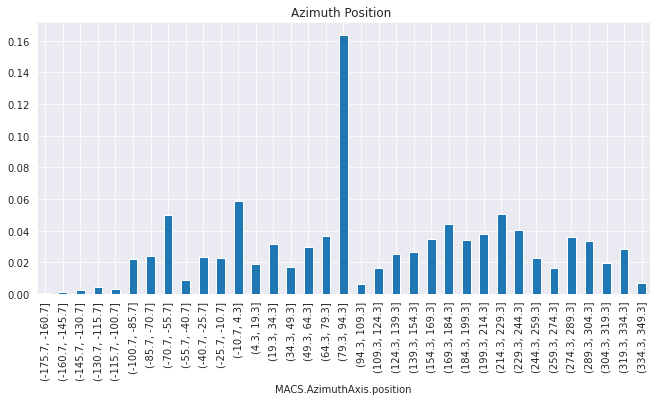

In [367]:
(azimuth_vals/df_track.shape[0]).plot(kind="bar");
plt.title("Azimuth Position ");

In [380]:
wind_dir_vals = df_track.groupby(pd.cut(df_track['EMCS.WeatherStation.windDirection'], np.arange(0, 360, 15)))['EMCS.WeatherStation.windDirection'].count()

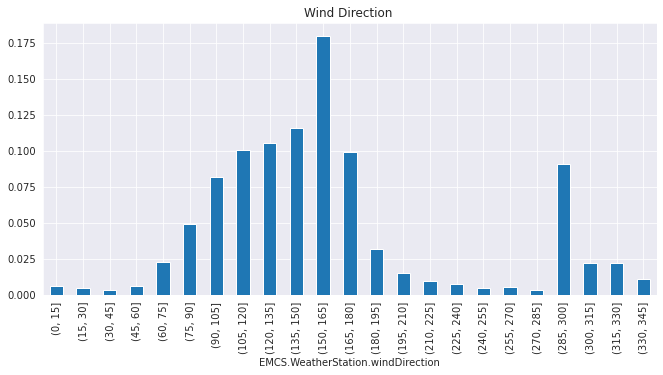

In [381]:
(wind_dir_vals/df_track.shape[0]).plot(kind="bar");
plt.title("Wind Direction ");

In [384]:
wind_speed_vals = df_track.groupby(pd.cut(df_track['EMCS.WeatherStation.windDirection'], np.arange(0, 360, 15)))['EMCS.WeatherStation.meanWindSpeed'].max()

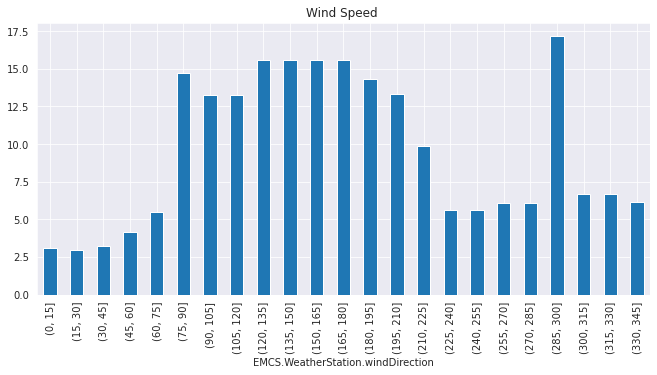

In [386]:
(wind_speed_vals).plot(kind="bar");
plt.title("Wind Speed ");

In [358]:
df.columns

Index(['TimeStampLong', 'OE.ObservingEngine.slowGuideErrorB',
       'MACS.ElevationAxis.position',
       'OE.ObservingEngine.currentObservingState',
       'ECS.DomeRotation.actualPosition', 'EMCS.WeatherStation.windDirection',
       'MACS.AzimuthAxis.position', 'ECS.UpperShutter.actualPosition',
       'MACS.AzimuthAxis.followingError', 'EMCS.WeatherStation.meanWindSpeed',
       'OE.ObservingEngine.slowGuideErrorA'],
      dtype='object')